![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

<AxesSubplot:>

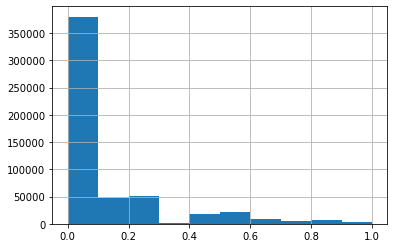

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train

101388    Oral history is what ever they say it is.  Naz...
187598    Marijuana is less harmful to human health, tha...
175087    Look and see how many women are in photos of t...
521167    see like others we stood up to south africa ye...
343059                And next, they'll be coming for ISIS.
                                ...                        
110268    It's sad that BC can only choose between Liber...
259178    I'll stick to the estimates from Walter E. Wil...
365838    Isn't this exactly what Trump (and Obama befor...
131932    "no loyalty to them", I assume you mean.\nExac...
121958    You apparently have not really studied the gos...
Name: comment_text, Length: 362779, dtype: object

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 1
# Lo primero que se hara es Aplicar tokenización a la variable comment_Text
vect_A = CountVectorizer()
X_train_token = vect_A.fit_transform(X_train)


In [11]:
# Ahora se transforma el Xtest
X_test_token = vect_A.transform(X_test)
X_test_token

<178683x141176 sparse matrix of type '<class 'numpy.int64'>'
	with 6862789 stored elements in Compressed Sparse Row format>

In [12]:
# Se revisa el vocabulario producto de la tokenización.
vect_A.vocabulary_


{'oral': 91127,
 'history': 60749,
 'is': 67439,
 'what': 136457,
 'ever': 46583,
 'they': 125107,
 'say': 110750,
 'it': 67682,
 'nazis': 86202,
 'in': 64454,
 'the': 124581,
 '1930': 1649,
 'did': 38596,
 'eugenic': 46371,
 'experiments': 47347,
 'on': 90518,
 'native': 86035,
 'children': 27384,
 'at': 14725,
 'mcgill': 80014,
 'with': 137734,
 'full': 52599,
 'knowledge': 71877,
 'of': 89814,
 'government': 55832,
 'yup': 139920,
 'if': 63495,
 'happened': 58373,
 'who': 136894,
 'are': 13363,
 'we': 135729,
 'to': 126248,
 'didn': 38619,
 'marijuana': 78894,
 'less': 74583,
 'harmful': 58542,
 'human': 62386,
 'health': 59284,
 'than': 124498,
 'cigarettes': 28085,
 'which': 136645,
 'widely': 137099,
 'used': 132446,
 'and': 11703,
 'there': 124961,
 'no': 87715,
 'ban': 16514,
 'reduces': 104654,
 'stress': 120277,
 'aggression': 9490,
 'level': 74674,
 'leading': 73899,
 'crime': 33788,
 'its': 67777,
 'medical': 80457,
 'value': 132943,
 'favorable': 48684,
 'effects': 43479,


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
## Se entrena el modelo de random forest regressor

rf= RandomForestRegressor(n_estimators=50, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)
rf.fit(X_train_token, y_train)

y_pred_arbol = rf.predict(X_test_token)

In [14]:
mse_arbol = mean_squared_error(y_test, y_pred_arbol)
print("El valor del Mse es: "+ str(mse_arbol))
print("El valor del RMSE es: "+ str(mse_arbol**(1/2)))


El valor del Mse es: 0.03776894080046146
El valor del RMSE es: 0.19434232889533218


Un valor de 0.1943 para el RMSE del modelo de random forest quiere decir que el modelo no esta prediciendo de una manera muy acertada teniendo en cuenta que las probabilidades toman valores entre 0 y 1. Para mejorar este rendimiento se podria mejorar el proceso de tokenización utilizando n_gramas, ya que es posible que al tomar como token mas conjuntos de palabras estas tengan un mayor sentido para determinar la probabilidad de que una noticia sea toxica o no. En este caso estamos tomando cada palabra como un solo token, por tanto, algunas palabras no aportan significativamente al rendimiento del modelo

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 2
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Aplicar tokenización a la vaibale comment_Text considerando trigramas
vect_trigram = CountVectorizer(ngram_range=(3, 3))
X_train_trigram = vect_trigram.fit_transform(X_train)
X_test_trigram = vect_trigram.transform(X_test)


In [16]:
vect_trigram.vocabulary_

{'oral history is': 6352957,
 'history is what': 3966108,
 'is what ever': 4550711,
 'what ever they': 9993182,
 'ever they say': 2859733,
 'they say it': 8971339,
 'say it is': 7488580,
 'it is nazis': 4611057,
 'is nazis in': 4495130,
 'nazis in the': 5638448,
 'in the in': 4254245,
 'the in 1930': 8592275,
 'in 1930 did': 4168426,
 '1930 did eugenic': 36410,
 'did eugenic experiments': 2415219,
 'eugenic experiments on': 2828572,
 'experiments on native': 2927351,
 'on native children': 6185561,
 'native children at': 5629621,
 'children at mcgill': 1812337,
 'at mcgill with': 1021614,
 'mcgill with the': 5295277,
 'with the full': 10240084,
 'the full knowledge': 8563348,
 'full knowledge of': 3344544,
 'knowledge of the': 4821299,
 'of the government': 6067505,
 'the government yup': 8572763,
 'government yup if': 3543066,
 'yup if they': 10539433,
 'if they say': 4117017,
 'say it happened': 7488561,
 'it happened who': 4603921,
 'happened who are': 3657547,
 'who are we': 100869

In [17]:
rf_trigram = RandomForestRegressor(n_estimators=50, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)
rf_trigram.fit(X_train_trigram, y_train)
y_pred_trigram = rf_trigram.predict(X_test_trigram)

In [18]:
mse_trigram = mean_squared_error(y_test, y_pred_trigram)
print("El valor del MSE con trigramas es: ", mse_trigram)
print("El valor del RMSE con trigramas es: ", mse_trigram**0.5)

El valor del MSE con trigramas es:  0.03899757390702638
El valor del RMSE con trigramas es:  0.19747803398612812


Con base a los valores obtenidos utilizando el modelo de Random Forest, se puede analizar lo siguiente:


El MSE esta indicando que el promedio de los errores entre las predicciones y los valores reales es de 0.038. Este resultado es bajo, lo que sugiere que las predicciones no se alejan tanto de los valores reales; además comparando con el punto anterior no cambian mucho los resultados.


Teniendo en cuenta que el modelo tiene como objetivo identificar la probabilidad de los comentarios toxicos, el RMSE de 0.197 nos podría indicar que el modelo no esta clasificando correctamente los comentarios; pudiendo haber aspectos de mejora como la optimización de parámetros y/o métodos de preprocesamiento del texto.


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

El vectorizador TfidfVectorizer, parte de la biblioteca scikit-learn, es esencial en el procesamiento de textos para transformarlos en una matriz de características TF-IDF (Frecuencia del Término - Frecuencia Inversa del Documento). Esta herramienta analiza la relevancia de una palabra dentro de un conjunto de textos o corpus. El valor TF-IDF se incrementa con la frecuencia de la palabra en un documento, pero se modula considerando su presencia en el corpus completo, lo que permite ajustar por palabras que son comúnmente más frecuentes. (Gonzalez, Juan, 2019)

### Cómo funciona:
1. **Frecuencia del Término (TF)**: Calcula cuántas veces aparece una palabra en un documento en relación al total de palabras del mismo. TF(t) = (Número de veces que el término t aparece en un documento) / (Número total de términos en el documento).
2. **Frecuencia Inversa del Documento (IDF)**: Estima la rareza de una palabra en el corpus, atenuando la importancia de aquellas que son muy comunes y menos informativas. IDF(t) = log_e(Total de documentos / Número de documentos que incluyen el término t). (Gonzalez, Juan, 2019)

### Comparativa con CountVectorizer:
- **CountVectorizer**: Cuenta simplemente la cantidad de veces que una palabra aparece en el texto. Aunque útil para ciertas aplicaciones analíticas, este método puede sobrevalorar palabras comunes y poco informativas como preposiciones o conjunciones.
- **TfidfVectorizer**: Al ajustar la frecuencia de los términos según su aparición en el corpus, TF-IDF destaca palabras que son distintivas para el documento, lo que es ventajoso para tareas de recuperación de información y clasificación de documentos. (Segui. eric, sf)

### Beneficios del TfidfVectorizer frente a CountVectorizer:
- **Enfasis en Palabras Pertinentes**: TF-IDF reduce la influencia de términos comunes que no aportan significativamente al contenido del texto, en contraste con CountVectorizer que podría enfatizarlos debido a su frecuencia.
- **Mejor Detección de Contexto**: TF-IDF puede elevar el desempeño en la clasificación y agrupación al conservar la relevancia relativa de los términos dentro de los documentos.

### Limitaciones:
- **Demanda Computacional**: Calcular el TF-IDF puede requerir más recursos computacionales que métodos basados en conteo simple, especialmente con grandes volúmenes de texto.
- **Sensibilidad a Corpus No Representativos**: Si el corpus no refleja adecuadamente el lenguaje o temas de interés, el cálculo del IDF puede ser ineficaz, resultando en ponderaciones erróneas.

### Usos Comunes:
- **Recuperación de Información**: TF-IDF se emplea frecuentemente en sistemas de búsqueda para evaluar y clasificar documentos según su relevancia ante una consulta.
- **Clasificación de Documentos**: Algoritmos de aprendizaje automático utilizan TF-IDF para identificar y predecir, beneficiándose de la ponderación relevante de palabras en los documentos.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Creación del TfidfVectorizer
vect_tfidf = TfidfVectorizer()
X_train_tfidf = vect_tfidf.fit_transform(X_train)
X_test_tfidf = vect_tfidf.transform(X_test)

# Entrenamiento del modelo de regresión con RandomForest
rf_tfidf = RandomForestRegressor(n_estimators=50, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)

# Predicción y cálculo del MSE
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)
mse_tfidf = mean_squared_error(y_test, y_pred_tfidf)
print("El valor del MSE con TF-IDF es: ", mse_tfidf)
print("El valor del RMSE con TF-IDF es: ", mse_tfidf**0.5)



El valor del MSE con TF-IDF es:  0.037727203714122456
El valor del RMSE con TF-IDF es:  0.19423491888463942


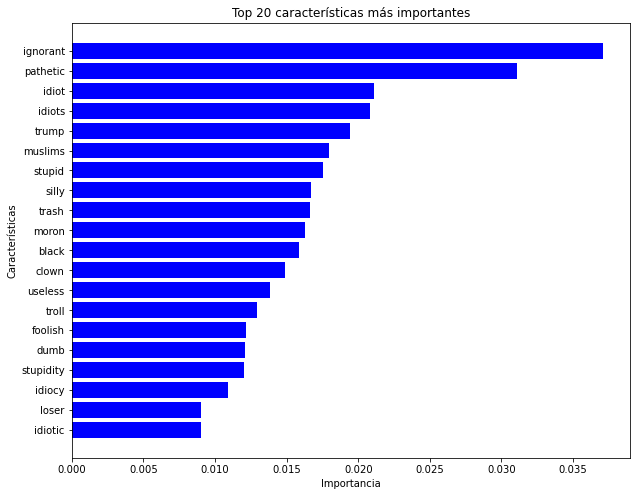

In [23]:
import matplotlib.pyplot as plt

# Obtener las importancias de las características y los nombres de las características
feature_importances = rf_tfidf.feature_importances_
feature_names = vect_tfidf.get_feature_names_out()

# Crear un DataFrame para facilitar la visualización
import pandas as pd
df_features = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Ordenar las características por importancia
df_features = df_features.sort_values('importance', ascending=False).head(20)

# Graficar las características más importantes
plt.figure(figsize=(10, 8))
plt.barh(df_features['feature'], df_features['importance'], color='blue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Top 20 características más importantes')
plt.gca().invert_yaxis()
plt.show()


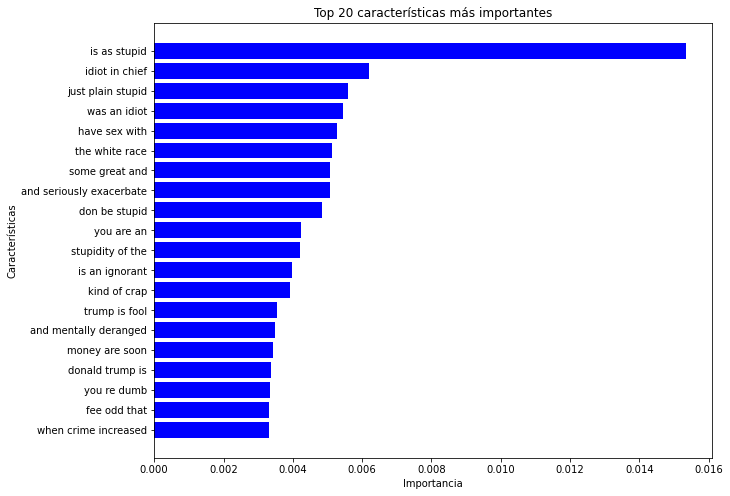

In [28]:
import matplotlib.pyplot as plt

# Obtener las importancias de las características y los nombres de las características
feature_importances = rf_trigram.feature_importances_
feature_names = vect_trigram.get_feature_names_out()

# Crear un DataFrame para facilitar la visualización
import pandas as pd
df_features = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Ordenar las características por importancia
df_features = df_features.sort_values('importance', ascending=False).head(20)

# Graficar las características más importantes
plt.figure(figsize=(10, 8))
plt.barh(df_features['feature'], df_features['importance'], color='blue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Top 20 características más importantes')
plt.gca().invert_yaxis()
plt.show()

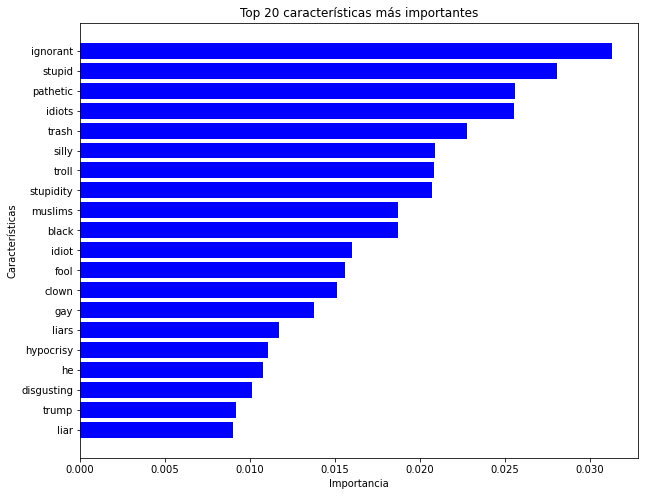

In [26]:
import matplotlib.pyplot as plt

# Obtener las importancias de las características y los nombres de las características
feature_importances = rf.feature_importances_
feature_names = vect_A.get_feature_names_out()

# Crear un DataFrame para facilitar la visualización
import pandas as pd
df_features = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Ordenar las características por importancia
df_features = df_features.sort_values('importance', ascending=False).head(20)

# Graficar las características más importantes
plt.figure(figsize=(10, 8))
plt.barh(df_features['feature'], df_features['importance'], color='blue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Top 20 características más importantes')
plt.gca().invert_yaxis()
plt.show()


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Modificar el TfidfVectorizer para incluir unigramas, bigramas y trigramas
vect_tfidf = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = vect_tfidf.fit_transform(X_train)
X_test_tfidf = vect_tfidf.transform(X_test)

# Entrenamiento del modelo de regresión con RandomForest
rf_tfidf = RandomForestRegressor(n_estimators=50, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)

# Predicción y cálculo del MSE
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)
mse_tfidf = mean_squared_error(y_test, y_pred_tfidf)
print("El valor del MSE con TF-IDF (unigramas, bigramas, y trigramas) es: ", mse_tfidf)
print("El valor del RMSE con TF-IDF (unigramas, bigramas, y trigramas) es: ", mse_tfidf**0.5)


El valor del MSE con TF-IDF (unigramas, bigramas, y trigramas) es:  0.03877955153919375
El valor del RMSE con TF-IDF (unigramas, bigramas, y trigramas) es:  0.19692524352960375


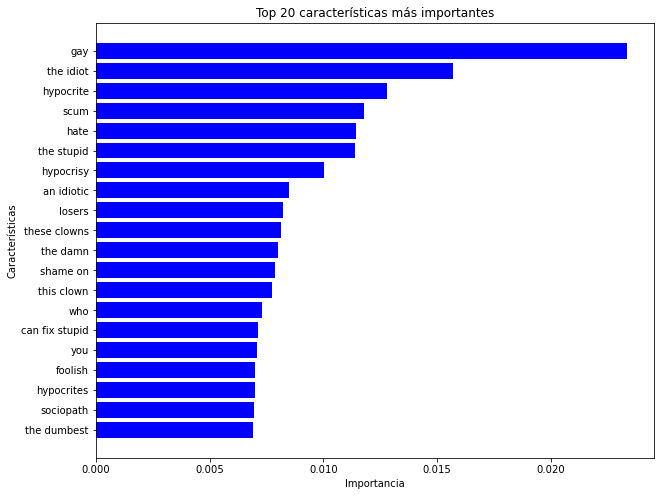

In [31]:
import matplotlib.pyplot as plt

# Obtener las importancias de las características y los nombres de las características
feature_importances = rf_tfidf.feature_importances_
feature_names = vect_tfidf.get_feature_names_out()

# Crear un DataFrame para facilitar la visualización
import pandas as pd
df_features = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Ordenar las características por importancia
df_features = df_features.sort_values('importance', ascending=False).head(20)

# Graficar las características más importantes
plt.figure(figsize=(10, 8))
plt.barh(df_features['feature'], df_features['importance'], color='blue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Top 20 características más importantes')
plt.gca().invert_yaxis()
plt.show()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Modificar el TfidfVectorizer para incluir trigramas
vect_tfidf = TfidfVectorizer(ngram_range=(3, 3))
X_train_tfidf = vect_tfidf.fit_transform(X_train)
X_test_tfidf = vect_tfidf.transform(X_test)

# Entrenamiento del modelo de regresión con RandomForest
rf_tfidf = RandomForestRegressor(n_estimators=50, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)

# Predicción y cálculo del MSE
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)
mse_tfidf = mean_squared_error(y_test, y_pred_tfidf)
print("El valor del MSE con TF-IDF (trigramas) es: ", mse_tfidf)
print("El valor del RMSE con TF-IDF (trigramas) es: ", mse_tfidf**0.5)

El valor del MSE con TF-IDF (trigramas) es:  0.03899292829398394
El valor del RMSE con TF-IDF (trigramas) es:  0.19746627128191777


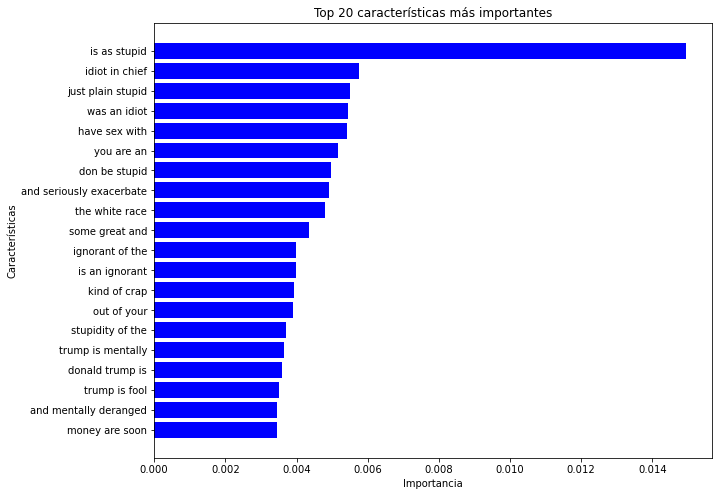

In [34]:
import matplotlib.pyplot as plt

# Obtener las importancias de las características y los nombres de las características
feature_importances = rf_tfidf.feature_importances_
feature_names = vect_tfidf.get_feature_names_out()

# Crear un DataFrame para facilitar la visualización
import pandas as pd
df_features = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Ordenar las características por importancia
df_features = df_features.sort_values('importance', ascending=False).head(20)

# Graficar las características más importantes
plt.figure(figsize=(10, 8))
plt.barh(df_features['feature'], df_features['importance'], color='blue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Top 20 características más importantes')
plt.gca().invert_yaxis()
plt.show()

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [21]:
# Celda 5
# Presentación de los resultados
print("MSE con tokenización básica: ", mse_arbol)
print("RMSE con tokenización básica: ", mse_arbol**0.5)
print("MSE con trigramas: ", mse_trigram)
print("RMSE con trigramas: ", mse_trigram**0.5)
print("MSE con TF-IDF: ", mse_tfidf)
print("RMSE con TF-IDF: ", mse_tfidf**0.5)

MSE con tokenización básica:  0.03776894080046146
RMSE con tokenización básica:  0.19434232889533218
MSE con trigramas:  0.03899757390702638
RMSE con trigramas:  0.19747803398612812
MSE con TF-IDF:  0.037727203714122456
RMSE con TF-IDF:  0.19423491888463942


### Analisis:

Los métodos de tokenización básica y TF-IDF ofrecen una precisión predictiva similar y mejor en comparación con el uso de trigramas, con TF-IDF mostrando una ligera ventaja. Esto podría indicar que TF-IDF, al tener en cuenta la importancia relativa de cada término dentro del conjunto de datos, es ligeramente más efectivo para este caso específico. Sin embargo, la diferencia entre TF-IDF y la tokenización básica es muy pequeña, se podria revisar otros modelos sin embargo notamos como el metodo TF-IDF consume muchos recursos, probamos otras ajustes pero la maquina no respondia.

Adicionalmente vemos en los graficos como el basico y el tf-idf muestran valores de importancia similares por ende el resultado es muy parecido.

Cuando incluimos ngramas usando unigramas, bigramas y trigramas en el grafico vemos como cambia sin embargo las metricas no mejoran, pero si se ven unigramas como gay que coje una mejor relevancia si lo comparamos con los otros modelos.

Se prueba con trigramas tambien pero tampoco mejora como vemos en las graficas.
